In [1]:
from FedDifPrivModels.FedPGMDataset import FedPGMDataset
from FedDifPrivModels.FedDataset import FedDataset
from FedDifPrivModels.FedAllInOnePGM import FedAllInOnePGM
from FedDifPrivModels.FedAdapIterPGM import FedAdapIterPGM
from FedDifPrivModels.Evaluation import Evaluation
from FedDifPrivModels.Utils import FL_split_data, map_to_other_discritization, isNaN
from mbi import domain, Dataset
import numpy as np
import pandas as pd
import pickle as pk


C:\Users\erkjrv\Anaconda3\lib\site-packages\mbi\__init__.py:15: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn('MixtureInference disabled, please install jax and jaxlib')


In [2]:
#set seed
seed = 1234#453434534532352446549274
rng = np.random.default_rng(seed)

#load raw dataset
computerPath = "C:/Users/erkjrv/OneDrive - TNO/wp3-federated-synthetic-data/thesis_julian"
#with open(f'{computerPath}/pickle_data/adult.pickle', 'rb') as handle:
#        adult_raw, diMapper, lDataTypes, sYname, diMinMaxInfo, delimiterInfo, diCatUniqueValuesInfo = pk.load(handle)
#load raw dataset
#with open(f'{computerPath}/pickle_data/credit.pickle', 'rb') as handle:
#        adult_raw, diMapper, lDataTypes, sYname, diMinMaxInfo, delimiterInfo, diCatUniqueValuesInfo = pk.load(handle)#
with open(f'{computerPath}/pickle_data/adult.pickle', 'rb') as handle:
        adult_raw, diMapper, lDataTypes, sYname, diMinMaxInfo, delimiterInfo, diCatUniqueValuesInfo = pk.load(handle)#

#set number of clients
iC = 5
lFrac = iC * [1/iC]
lFrac = [0.5,0.2,0.1,0.1,0.1]

#set y fraction
yFrac = [5.0, 2.0, 1.0, 1.0, 1.0]
#yFrac = [1.0, 1.0, 1.0, 1.0, 1.0]

#split data
iRep = 1#10
llClientTrainDataRaw = iRep*[None]
llClientTestDataRaw = iRep*[None]
lTotalTrainData = iRep*[None]
lTotalTestData = iRep*[None]
for i in range(iRep):
        llClientTrainDataRaw[i], llClientTestDataRaw[i] = FL_split_data(adult_raw, dTrainFrac = 0.75, iC = iC, lFrac = lFrac, sYname = sYname, yFrac = yFrac, rng = rng, diMapper = diMapper)
        
        #create total train, test
        lTotalTrainData[i] = pd.concat(llClientTrainDataRaw[i])
        lTotalTestData[i] = pd.concat(llClientTestDataRaw[i])

##create total train, test
#totalTrainData = pd.concat(lClientTrainDataRaw)
#totalTestData = pd.concat(lClientTestDataRaw)

bCombineLevels = False

17.317789578119594

 <=50K    11380
 >50K      3620
Name: income>50K, dtype: int64
 <=50K    2279
 >50K      721
Name: income>50K, dtype: int64


In [3]:
lModels = iRep*[None]
lFedDataset = iRep*[None]
for i in range(iRep):
    print(i+1)
    fedAllInOnePGM = FedAllInOnePGM(dMu = 0.1, rng = rng, bVerbose=True, sGraphType = "tree", sScoreType = "standard", bCombineLevels = bCombineLevels, iMaxRoundsNumerical=4)
    #fedAdapIterPGM = FedAdapIterPGM(dMu = 1.0, dTheta = 6.0, rng = rng, iMaxDegree=3, bVerbose=True, sGraphType = "maxJTsize", dMaxJTsize = 5, sScoreType = "standard", bCombineLevels = bCombineLevels)
    #fedIndepPGM = FedAdapIterPGM(dMu = 1.0, dQuadInitBudgetProp = 1.0, rng = rng, iMaxDegree=3, bVerbose=False, sGraphType = "maxJTsize", sScoreType = "standard", bCombineLevels = bCombineLevels)
    lModels[i], lFedDataset[i] = fedAllInOnePGM.fit(llClientTrainDataRaw[i], diMinMaxInfo = diMinMaxInfo, diCatUniqueValuesInfo = diCatUniqueValuesInfo, lDataTypes = lDataTypes)
    #lModels[i], lFedDataset[i] = fedAdapIterPGM.fit(llClientTrainDataRaw[i], diMinMaxInfo = diMinMaxInfo, diCatUniqueValuesInfo = diCatUniqueValuesInfo, lDataTypes = lDataTypes)
    #lModels[i], lFedDataset[i] = fedIndepPGM.fit(llClientTrainDataRaw[i], diMinMaxInfo = diMinMaxInfo, diCatUniqueValuesInfo = diCatUniqueValuesInfo, lDataTypes = lDataTypes)

1
start discritization and initial measurement
start initial estimation
start second selection step
start final estimation
Total clique size: 1669
iteration		time		l1_loss		l2_loss		feasibility
0.00		0.00		2532.67		12839.82		0.00
50.00		0.63		1824.73		2154.06		0.00
100.00		1.20		1443.39		981.94		0.00
150.00		1.78		1274.37		755.17		0.00
200.00		2.36		1191.66		663.02		0.00
250.00		2.92		1141.64		612.50		0.00
300.00		3.50		1117.65		586.04		0.00
350.00		4.07		1100.39		566.55		0.00
400.00		4.64		1085.68		552.41		0.00
450.00		5.22		1080.66		542.06		0.00
500.00		5.79		1076.37		536.16		0.00
550.00		6.36		1073.16		532.16		0.00
600.00		6.93		1070.47		529.10		0.00
650.00		7.50		1069.44		526.66		0.00
700.00		8.08		1066.87		525.09		0.00
750.00		8.65		1064.61		523.74		0.00
800.00		9.22		1063.64		522.60		0.00
850.00		9.79		1064.16		521.92		0.00
900.00		10.37		1062.59		521.33		0.00
950.00		10.94		1061.37		520.79		0.00
1000.00		11.52		1060.49		520.28		0.00
1050.00		12.09		1060.16		519.96		0.00
1100.00	

In [5]:
synth = lModels[0].synthetic_data(rows = lTotalTrainData[0].shape[0])

In [6]:
totalTestDataDiscrete, _ = lFedDataset[0].discretize_out_of_sample(lTotalTestData[0])
lTestDataDicreteClient = [ lFedDataset[0].discretize_out_of_sample(llClientTestDataRaw[0][c])[0] for c in range(iC)]
totalTrainDataDiscrete, _ = lFedDataset[0].discretize_out_of_sample(llClientTrainDataRaw[0][0])#lFedDataset[0].discretize_out_of_sample(lTotalTrainData[0])

In [7]:
if bCombineLevels:
    dfDefaultSynth = synth.df
    dfDefaultTest, _ = lFedDataset[0].discretize_out_of_sample(lTotalTestData[0], diFinalBins = lFedDataset[0].diBins)
    dfDefaultTrain, _ = lFedDataset[0].discretize_out_of_sample(lTotalTrainData[0], diFinalBins = lFedDataset[0].diBins)
else:
    dfDefaultSynth = synth.df
    dfDefaultTest = lTestDataDicreteClient[0]
    dfDefaultTrain = totalTrainDataDiscrete

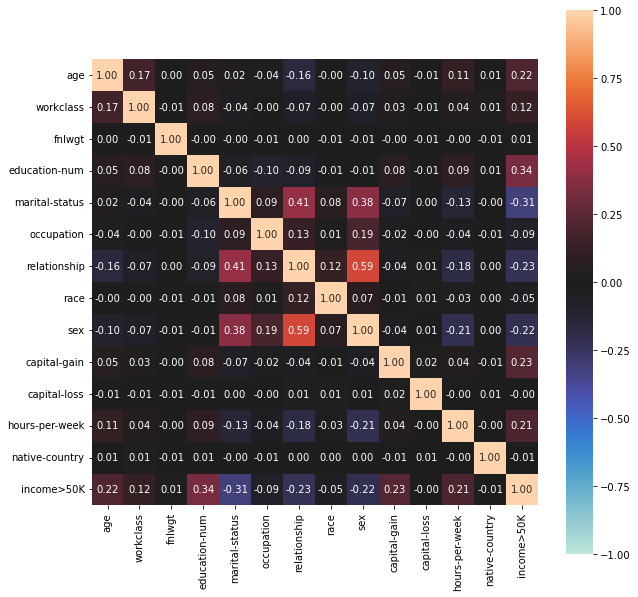

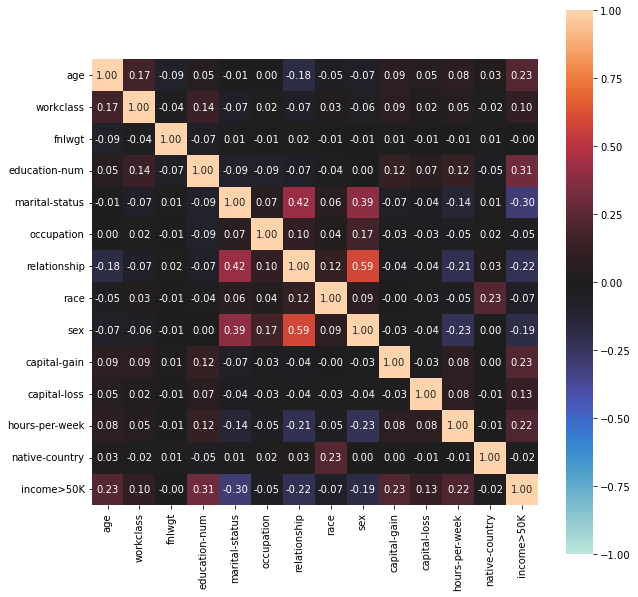

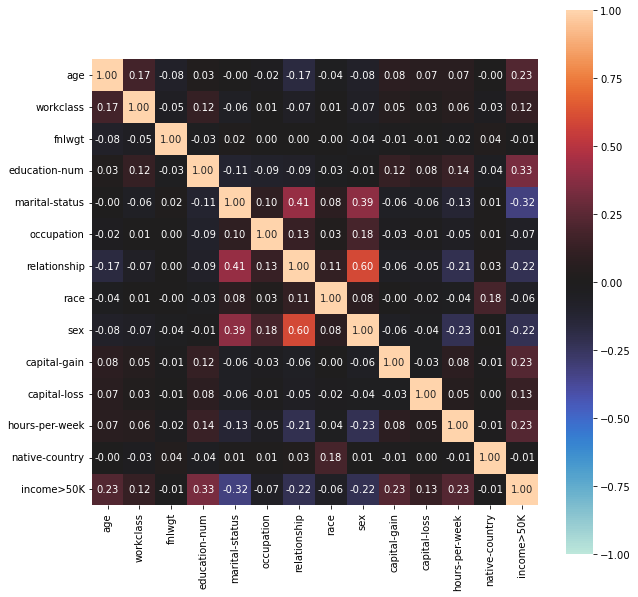

In [8]:
from dython.nominal import associations

#synthetic
completeCorrelationSynth= associations(dfDefaultSynth, nom_nom_assoc="cramer",  filename= 'complete_correlation_synth.png', figsize=(10,10))

#real 
completeCorrelationReal= associations(dfDefaultTest, nom_nom_assoc="cramer",  filename= 'complete_correlation_real.png', figsize=(10,10))

#train
completeCorrelationReal= associations(dfDefaultTrain, nom_nom_assoc="cramer",  filename= 'complete_correlation_real.png', figsize=(10,10))

In [4]:
np.random.seed(12345)
iRepIndiv = 5#10
lldfSynth = [[lModels[j].synthetic_data(rows = lTotalTestData[j].shape[0]).df for i in range(iRepIndiv)] for j in range(iRep)]
lldfOrig = [[FedDataset.transform_to_original_space(lldfSynth[j][i], lDataTypes, diBins = lFedDataset[j].diBins, diDefaultBins = lFedDataset[j].diBins, delimiterInfo = delimiterInfo, rng = rng) for i in range(iRepIndiv)] for j in range(iRep)]

In [5]:
evalObject = Evaluation(lldfOrig[0], lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
vRes = evalObject.utility(sModel = "randomforest", yVarName = sYname)
print(vRes)

(array([[0.7512    , 0.16685233, 0.37518835, 0.4785394 , 0.30855019,
        0.77290336],
       [0.7432    , 0.15600274, 0.35832084, 0.45351044, 0.29615861,
        0.76685475],
       [0.7535    , 0.16619816, 0.36419912, 0.48489011, 0.29161504,
        0.77866386],
       [0.7467    , 0.15878819, 0.34934498, 0.46195652, 0.28087567,
        0.77185885],
       [0.7609    , 0.18266719, 0.36628677, 0.51109467, 0.28541925,
        0.78358501]]), array([[0.858     , 0.44778324, 0.68175706, 0.74522293, 0.62825279,
        0.90454736]]))


In [7]:
vRes[0][:,0]

array([0.7907, 0.787 , 0.7865, 0.7914, 0.7862])

In [10]:
mResultsOrig = np.zeros((iRep,iRepIndiv))
for i in range(iRep):
    print(i+1)
    ldfSynth = lldfOrig[i]
    evalObject = Evaluation(ldfSynth, lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
    vRes = evalObject.marginalError(iMargOrder=1)
    mResultsOrig[i,:] = vRes

1


In [11]:
meanResults = np.mean(mResultsOrig, axis = 1)
print(f"mean: {np.mean(meanResults)}, stdev mean-of-means: {np.std(meanResults)/np.sqrt(iRep)}")

mean: 0.031150769230769232, stdev mean-of-means: 0.0


In [12]:
mResultsOrig = np.zeros((iRep,iRepIndiv))
for i in range(iRep):
    print(i+1)
    ldfSynth = lldfOrig[i]
    evalObject = Evaluation(ldfSynth, lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
    vRes = evalObject.marginalError(iMargOrder=2)
    mResultsOrig[i,:] = vRes

1


In [13]:
meanResults = np.mean(mResultsOrig, axis = 1)
print(f"mean: {np.mean(meanResults)}, stdev mean-of-means: {np.std(meanResults)/np.sqrt(iRep)}")

mean: 0.07742644444444444, stdev mean-of-means: 0.0


In [14]:
mResultsOrig = np.zeros((iRep,iRepIndiv))
for i in range(iRep):
    print(i+1)
    ldfSynth = lldfOrig[i]
    evalObject = Evaluation(ldfSynth, lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
    vRes = evalObject.marginalError(iMargOrder=3)
    mResultsOrig[i,:] = vRes

1


In [15]:
meanResults = np.mean(mResultsOrig, axis = 1)
print(f"mean: {np.mean(meanResults)}, stdev mean-of-means: {np.std(meanResults)/np.sqrt(iRep)}")

mean: 0.1436712947658402, stdev mean-of-means: 0.0


In [16]:
mResultsOrig = np.zeros((iRep,iRepIndiv))
for i in range(iRep):
    print(i+1)
    ldfSynth = lldfOrig[i]
    evalObject = Evaluation(ldfSynth, lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
    mRes = evalObject.discriminator(sModel = "logistic")
    mResultsOrig[i,:] = 1.0 + 4.0 * mRes[:,1]

1


C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erkjrv\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

In [17]:
meanResults = np.mean(mResultsOrig, axis = 1)
print(f"mean: {np.mean(meanResults)}, stdev mean-of-means: {np.std(meanResults)/np.sqrt(iRep)}")

mean: -0.0044770108984123706, stdev mean-of-means: 0.0


In [18]:
mResultsOrig = np.zeros((iRep,iRepIndiv))
for i in range(iRep):
    print(i+1)
    ldfSynth = lldfOrig[i]
    evalObject = Evaluation(ldfSynth, lTotalTrainData[i], lTotalTestData[i], lDataTypes=lDataTypes, fedDataset=lFedDataset[i],
                        sSynthType = "original", sEvalType = "original")
    mRes = evalObject.discriminator(sModel = "randomforest")
    mResultsOrig[i,:] = 1.0 + 4.0 * mRes[:,1]

1


In [19]:
meanResults = np.mean(mResultsOrig, axis = 1)
print(f"mean: {np.mean(meanResults)}, stdev mean-of-means: {np.std(meanResults)/np.sqrt(iRep)}")

mean: 0.12812843604420596, stdev mean-of-means: 0.0


UTILITY